## Notebook 2: Exploratory Data Analysis

## Exploratory Data Analysis Method:

In order to explore the data set and understand what it contains I will be aiming to answer the following questions:

- What is the distribution of the target classes for Kingdom? 
- What is the distribution of the target classes for DNAtype?
- What does the distribution for the Ncodons column look like?
- Are there codons that have a higher occurance in certain DNA types?
- Are there codons that have a higher occurence in certain Kingdoms?

In [128]:
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import (GridSearchCV, cross_val_score,
                                     train_test_split)
from sklearn.metrics import (accuracy_score, auc, classification_report,
                             confusion_matrix, f1_score, plot_confusion_matrix,
                             plot_roc_curve, precision_score, recall_score,
                             roc_auc_score, roc_curve)
from sklearn.linear_model import LogisticRegression
from sklearn.decomposition import PCA
import warnings
import joblib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import plotly.express as px
import plotly.graph_objects as go
import seaborn as sns
from scipy import stats

%matplotlib inline


# warnings.filterwarnings("ignore")
np.random.seed(123)


In [129]:
# importing the cleaned dataframe dfcodon1 and renaming it to codon

codon = joblib.load('../data/dfcodon1.pkl')


In [130]:
# Dataframe Shape
print(
    f'The dataframe contains {codon.shape[0]} rows and {codon.shape[1]} columns')


The dataframe contains 13028 rows and 69 columns


In [131]:
# peeking at the dataframe
codon.sample(5)


,Kingdom,DNAtype,SpeciesID,Ncodons,SpeciesName,UUU,UUC,UUA,UUG,CUU,...,CGG,AGA,AGG,GAU,GAC,GAA,GAG,UAA,UAG,UGA
11544,vertebrate,1,71258,4460,mitochondrion Hypopomus occidentalis,0.01951,0.02623,0.02354,0.01076,0.03274,...,0.00740,0.00000,0.00000,0.00090,0.00269,0.01726,0.00359,0.00404,0.00314,0.03139
12258,mammal,0,30521,14077,Bos grunniens,0.01698,0.01954,0.00789,0.01435,0.01279,...,0.00902,0.01179,0.00980,0.02579,0.02941,0.02998,0.03467,0.00107,0.00078,0.00199
2177,virus,0,394337,1359,Tomato leaf curl New Delhi virus-[Multan;Luffa],0.02134,0.02428,0.00736,0.01177,0.01545,...,0.00736,0.01472,0.01325,0.02943,0.01840,0.02796,0.01545,0.00221,0.00147,0.00221
11615,vertebrate,0,7792,11800,Heterodontus francisci,0.01661,0.01720,0.00712,0.01025,0.00941,...,0.00890,0.01517,0.01025,0.02017,0.02339,0.02881,0.02661,0.00068,0.00042,0.00144
3172,bacteria,0,320122,13771,Clostridium phage phi CD119,0.03544,0.00588,0.04480,0.01089,0.01343,...,0.00029,0.02926,0.00508,0.04647,0.01017,0.06739,0.01808,0.00334,0.00182,0.00058


In [132]:
# Describing the dataframe
codon.describe()


,DNAtype,SpeciesID,Ncodons,UUU,UUC,UUA,UUG,CUU,CUC,CUA,...,CGG,AGA,AGG,GAU,GAC,GAA,GAG,UAA,UAG,UGA
count,13028.000000,13028.000000,1.302800e+04,13028.000000,13028.000000,13028.000000,13028.000000,13028.000000,13028.000000,13028.000000,...,13028.000000,13028.000000,13028.000000,13028.000000,13028.000000,13028.000000,13028.000000,13028.000000,13028.000000,13028.000000
mean,0.367209,130451.105926,7.960576e+04,0.024819,0.023440,0.020635,0.014104,0.017822,0.018286,0.019043,...,0.005452,0.009929,0.006422,0.024183,0.021164,0.028292,0.021683,0.001640,0.000590,0.006178
std,0.688726,124787.086107,7.197010e+05,0.017627,0.011597,0.020709,0.009279,0.010587,0.014572,0.024251,...,0.006601,0.008574,0.006387,0.013826,0.013038,0.014343,0.015018,0.001785,0.000882,0.010344
min,0.000000,7.000000,1.000000e+03,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,28850.750000,1.602000e+03,0.013910,0.015380,0.005610,0.007108,0.010890,0.007830,0.005300,...,0.001220,0.001690,0.001168,0.012390,0.011860,0.017360,0.009710,0.000560,0.000000,0.000410
50%,0.000000,81971.500000,2.927500e+03,0.021750,0.021905,0.015260,0.013360,0.016130,0.014560,0.009680,...,0.003530,0.009270,0.004540,0.025435,0.019070,0.026085,0.020540,0.001380,0.000420,0.001130
75%,1.000000,222891.250000,9.120000e+03,0.031310,0.029210,0.029485,0.019803,0.022730,0.025110,0.017245,...,0.007150,0.015922,0.010250,0.034190,0.027690,0.036800,0.031122,0.002370,0.000830,0.002890
max,12.000000,465364.000000,4.066258e+07,0.217300,0.091690,0.151330,0.101190,0.089780,0.100350,0.163920,...,0.055540,0.098830,0.058430,0.185660,0.113840,0.144890,0.158550,0.045200,0.025610,0.106700


In [133]:
# Setting a theme for all the visualisations
sns.set_theme(style="darkgrid")
sns.set(rc={'figure.figsize': (11.7, 8.27)})


---

Plan for EDA:
- Univariate alalysis
- Bivariate analysis
- Check codon distribution for each Kingdom
- Check codon distribution for each DNAtype

## Univariate Analysis

Due to the dataframe containing 69 columns, this will be hard to visualise without breaking up the dataframe into focus points. So, I will isolate the codon columns into a separate dataframe and the rest of the columns into another one, and then do univariate analysis.

- **Separating the codon only columns**

In [134]:
justcodon = codon.drop(
    columns=['Kingdom', 'DNAtype', 'SpeciesID', 'Ncodons', 'SpeciesName'], axis=1)
justcodon.sample(3)


,UUU,UUC,UUA,UUG,CUU,CUC,CUA,CUG,AUU,AUC,...,CGG,AGA,AGG,GAU,GAC,GAA,GAG,UAA,UAG,UGA
1830,0.02869,0.01967,0.01742,0.01527,0.02859,0.01312,0.01199,0.00932,0.02664,0.01178,...,0.00113,0.01445,0.00451,0.03043,0.02244,0.02613,0.02152,0.00092,0.00000,0.00020
2592,0.00948,0.02212,0.00316,0.01422,0.00790,0.01106,0.00790,0.02291,0.01106,0.02212,...,0.00316,0.01422,0.00790,0.00711,0.02765,0.01896,0.02291,0.00079,0.00000,0.00000
1004,0.01659,0.02461,0.01495,0.00981,0.01207,0.01433,0.01130,0.00940,0.01644,0.02250,...,0.00817,0.01521,0.01433,0.02666,0.02214,0.02764,0.01741,0.00319,0.00108,0.00057


- **Separating the non codon into dataframe**

In [135]:
non_codon = codon.drop(columns=codon.columns[5:], axis=1)
non_codon.head(3)


,Kingdom,DNAtype,SpeciesID,Ncodons,SpeciesName
0,virus,0,100217,1995,Epizootic haematopoietic necrosis virus
1,virus,0,100220,1474,Bohle iridovirus
2,virus,0,100755,4862,Sweet potato leaf curl virus


### Visualising non_codon

- What is the distribution of the target classes for Kingdom?

- What is the distribution of the target classes for DNAtype?

I will not be looking at `SepciesID` or `SpeciesName` as these columns won't have a distribution that offers any noteworthy insights.

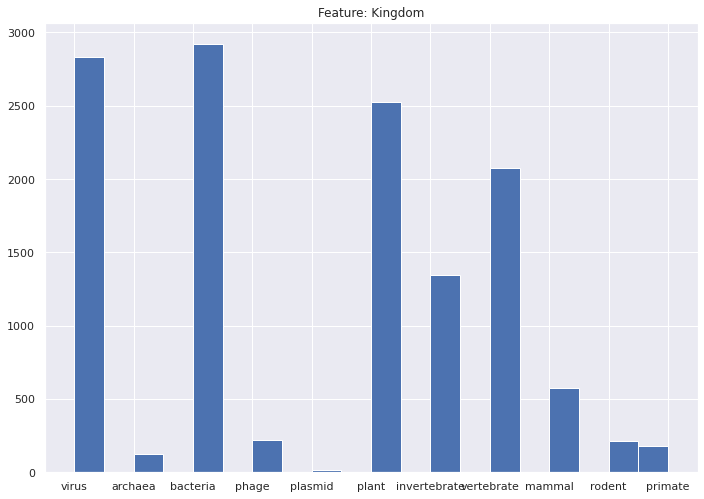

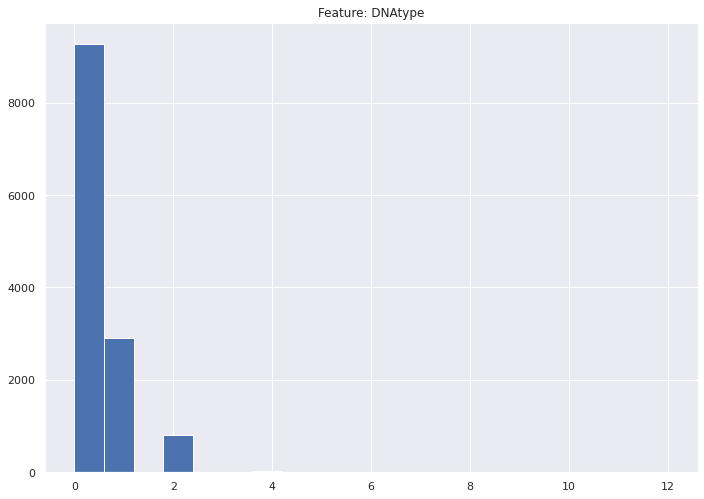

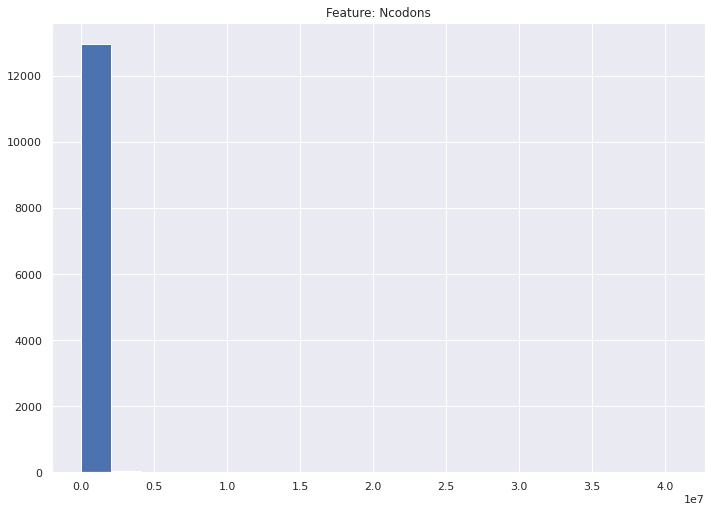

In [136]:
for col in non_codon[['Kingdom', 'DNAtype', 'Ncodons']]:
    plt.figure()
    plt.title(f'Feature: {col}')
    plt.hist(codon[col], bins=20)
    plt.show()


- `Kingdom` shows the counts of the different kingdom, with bacterial and viral being the ones with the most data points in this dataset.
- `DNAtype` has 12 unique values, however there only seems to show 0, 1, and 2. I will have to apply a log to this graph to see the counts of the other dna types and they could be muted by the high counts from the top three.
- `Ncodons` another distribution that is heavily skewed, I will visualise this one with a log transformation.

bacteria        22.413264
virus           21.737796
plant           19.365981
vertebrate      15.942585
invertebrate    10.323918
mammal           4.390543
phage            1.688671
rodent           1.650292
primate          1.381640
archaea          0.967148
plasmid          0.138164
Name: Kingdom, dtype: float64

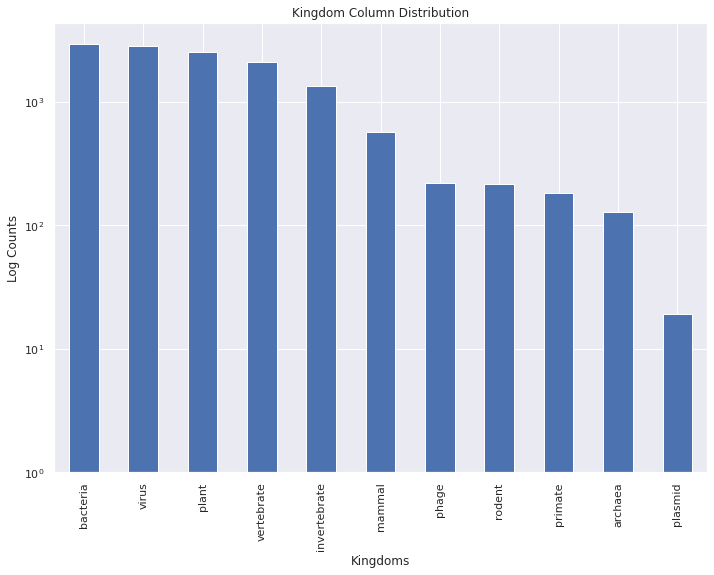

In [137]:
# Looking at the Kingdom column distribution using log transformation:
non_codon['Kingdom'].value_counts().plot(kind='bar', log=True)
plt.title('Kingdom Column Distribution')
plt.xlabel('Kingdoms')
plt.ylabel('Log Counts')

# Proportions of the Kingdom counts:
non_codon['Kingdom'].value_counts(normalize=True)*100


The dataset does contain rows for kingdoms beside the top three, however there is a high imbalance here. with some of the classes having less than 5%.
I will drop `plm` since it is <2% (18 entries).

Proportions of DNAtype counts


0     71.131409
1     22.252072
2      6.263433
4      0.237949
12     0.038379
3      0.015352
9      0.015352
5      0.015352
11     0.015352
6      0.007676
7      0.007676
Name: DNAtype, dtype: float64

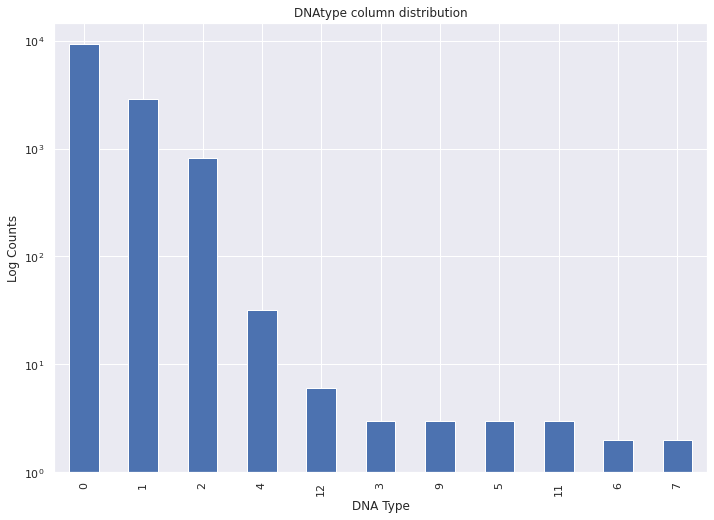

In [138]:
# Looking at DNAtype column distribution with log transformation:
non_codon['DNAtype'].value_counts().plot(kind='bar', log=True)
plt.title('DNAtype column distribution')
plt.xlabel('DNA Type')
plt.ylabel('Log Counts')

print('Proportions of DNAtype counts')
# Proportions of the DNAtype counts:
non_codon['DNAtype'].value_counts(normalize=True)*100


- **Thoughts**:

The columns `Kingdoms` and `DNAtype` will be the targets (separately) that I will be aiming to classify. Looking at the distributions, and the imbalances between the classes I will aim to drop some classes and the following is my reasoning.

In terms of kingdoms, the Dataset contains the following:
- pri: primate
- rod: rodent
- mam: mammalian
- vrt: vertebrate
- inv: invertebrate
- pln: plant
- bct: bacteria
- vrl: virus
- phg :bacteriophage
- arc: archaea
- plm: plasmid

primate ,rodent, and mammalian can be grouped and renamed under the vertebrate kingdom, because they are vertebrates and are all mammals
- vrt = vrt + pri + rod + mam 

The column will then have the following classes:
- vrt: vertebrate
- inv: invertebrate
- pln: plant
- bct: bacteria
- vrl: virus
- phg :bacteriophage
- arc: archaea
- plm: plasmid

I will further disregard the rows that are class plm, as there are far too little entries (18 only).

Final classes will be:

- vrt: vertebrate
- inv: invertebrate
- pln: plant
- bct: bacteria
- vrl: virus
- phg :bacteriophage
- arc: archaea

Finally I will look at the distribution after these changes.

For the column `DNAtype`, it contains the following classes:
- 0: nuclear
- 1: mitochondrion
- 2: chloroplast
- 3: cyanelle
- 4: plastid
- 5: nucleomorph
- 6: secondary endosymbiont
- 7: chromoplast
- 8: leukoplast
- 9: NA
- 10: proplastid
- 11: apicoplast
- 12: kinetoplast

As seen in the `DNAtype` distribution, there is a high imbalance between these classes. I will focus here on the top three which are 0 (nuclear), 1 (mitochonrion), and 2(chloroplast). These three DNA types that are present in all of the kingdoms in our dataset, so I will go ahead with these as they are representative. I will drop all rows that do not contain 0, 1, or 2, as the are less than 1% of the dataset.

- **Kingdom Column**

In [139]:
# changing the value names as stated above:
non_codon = non_codon.replace(['primate', 'rodend', 'mammal'], 'vertebrate')

# dropping rows with value plm
non_codon = non_codon.drop(
    non_codon.loc[non_codon['Kingdom'] == 'plasmid'].index)


Text(0, 0.5, 'Log Counts')

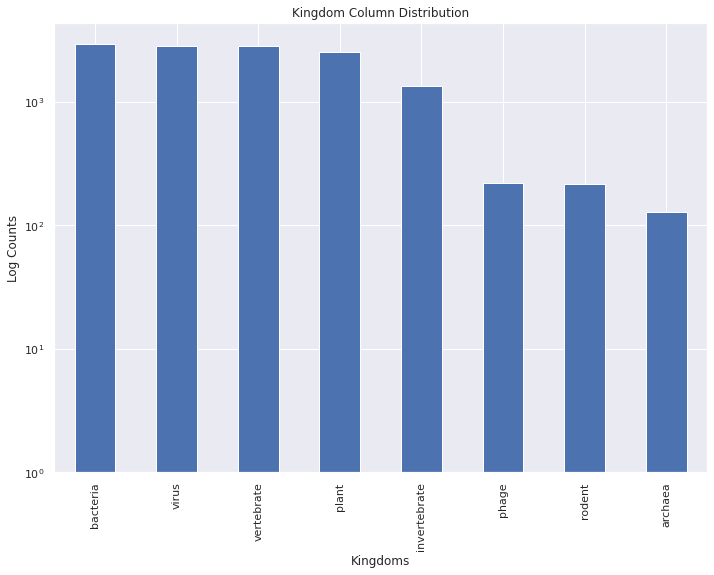

In [140]:
non_codon['Kingdom'].value_counts().plot(
    kind='bar', log=True)  # no log applied
plt.title('Kingdom Column Distribution')
plt.xlabel('Kingdoms')
plt.ylabel('Log Counts')


In [141]:
non_codon['Kingdom'].value_counts()


bacteria        2920
virus           2832
vertebrate      2829
plant           2523
invertebrate    1345
phage            220
rodent           215
archaea          126
Name: Kingdom, dtype: int64

As there are still imbalances in the data, this makes sense since genome lengths differ between species, so this imbalance is inevitable. For example for archea there are only 209 species, 

> Note: these changes have currently been made to the dataframe `non_codon` I will now apply these changes to the main dataframe `codon`

In [142]:
# changing the value names as stated above:
codon = codon.replace(['primate', 'rodent', 'mammal'], 'vertebrate')

# dropping rows with value plm
codon = codon.drop(codon.loc[codon['Kingdom'] == 'plasmid'].index)


- **DNAtype Column**

In [143]:
# Dropping all rows that do not contain 0, 1, or 2 as DNAtype:
non_codon = non_codon.drop(non_codon.loc[non_codon['DNAtype'] > 2].index)


Text(0, 0.5, 'Log Counts')

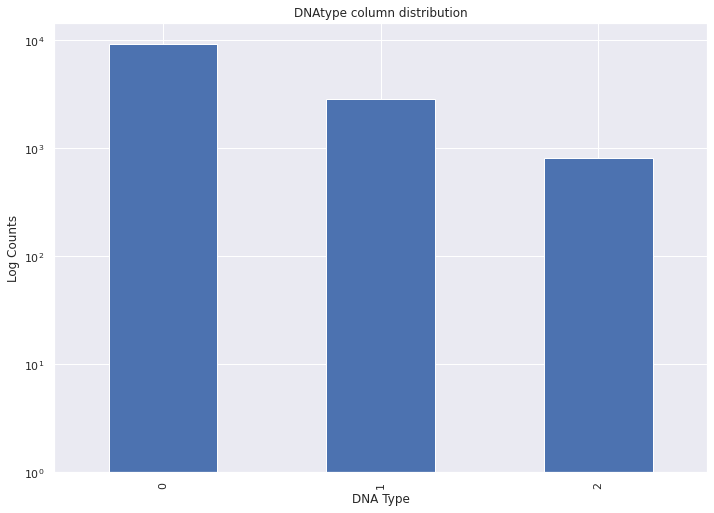

In [144]:
# Checking distribution:
non_codon['DNAtype'].value_counts().plot(
    kind='bar', log=True)  # log transformation not applied
plt.title('DNAtype column distribution')
plt.xlabel('DNA Type')
plt.ylabel('Log Counts')


The classes are highly imbalanced, but this can be adjusted later on during the modeling section.

Again, I will apply these changes to the original `codon` dataframe for consistency.

In [145]:
# Dropping rows in DNAtype with values larger than 2:
codon = codon.drop(codon.loc[codon['DNAtype'] > 2].index)


<AxesSubplot:>

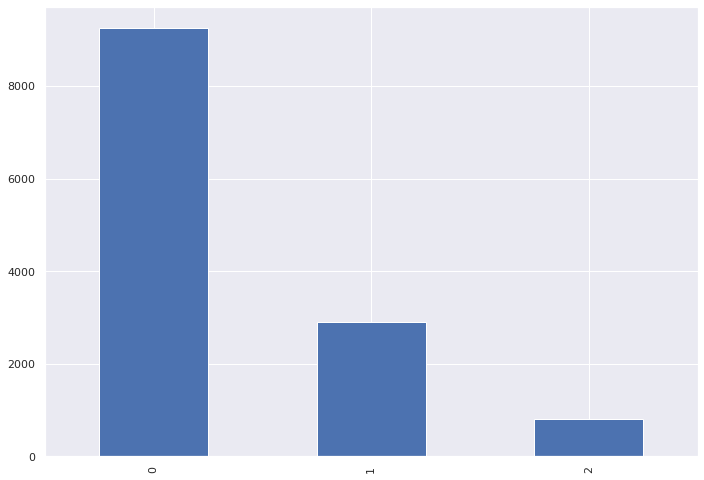

In [146]:
# Checking distribution in codon dataframe:
codon['DNAtype'].value_counts().plot(kind='bar')


- What does the distribution for the Ncodons column look like?

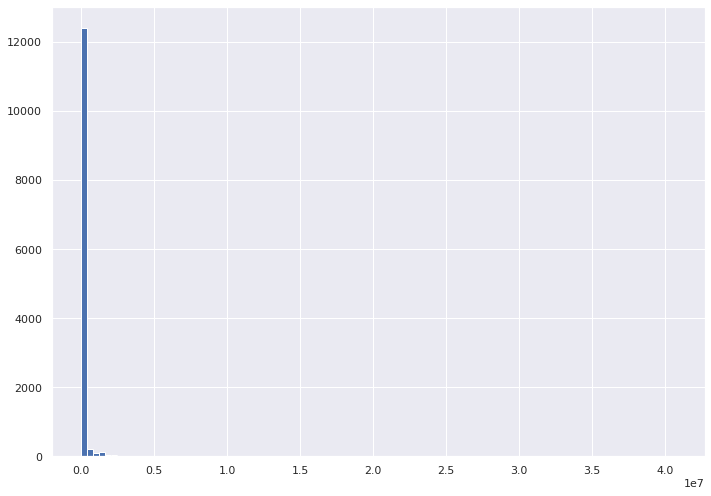

0         7.598900
1         7.296413
2         8.489411
3         7.557995
4        10.035918
           ...    
13023     7.001246
13024     7.634337
13025     7.430707
13026    17.520819
13027    16.012624
Name: Ncodons, Length: 12964, dtype: float64

In [147]:
# checking log transformed distribution
plt.figure()
plt.hist(non_codon['Ncodons'], bins=100)
plt.show()

print('===============================================')
non_codon['Ncodons'] = np.log(non_codon['Ncodons']+1)
non_codon['Ncodons']


`Ncodons` is highly skewed, this is because there are more species with smaller genomes and so smaller number of codons in the sequence.

Applying the log transformation change to the original dataframe `codon`

In [148]:
codon['Ncodons'] = np.log(codon['Ncodons']+1)
codon['Ncodons']


0         7.598900
1         7.296413
2         8.489411
3         7.557995
4        10.035918
           ...    
13023     7.001246
13024     7.634337
13025     7.430707
13026    17.520819
13027    16.012624
Name: Ncodons, Length: 12964, dtype: float64

Finally, the dataframe shape after transformation.

In [149]:
# the dataframe containing only the non_codon columns
print(
    f'The non_codon dataframe contains {non_codon.shape[0]} rows and {non_codon.shape[1]}')
# the original codon dataframe
print(
    f'The codon dataframe contains {codon.shape[0]} rows and {codon.shape[1]}')


The non_codon dataframe contains 12964 rows and 5
The codon dataframe contains 12964 rows and 69


---

### Visualising non_codon

In [150]:
justcodon.describe()


,UUU,UUC,UUA,UUG,CUU,CUC,CUA,CUG,AUU,AUC,...,CGG,AGA,AGG,GAU,GAC,GAA,GAG,UAA,UAG,UGA
count,13028.000000,13028.000000,13028.000000,13028.000000,13028.000000,13028.000000,13028.000000,13028.000000,13028.000000,13028.000000,...,13028.000000,13028.000000,13028.000000,13028.000000,13028.000000,13028.000000,13028.000000,13028.000000,13028.000000,13028.000000
mean,0.024819,0.023440,0.020635,0.014104,0.017822,0.018286,0.019043,0.018455,0.028354,0.025036,...,0.005452,0.009929,0.006422,0.024183,0.021164,0.028292,0.021683,0.001640,0.000590,0.006178
std,0.017627,0.011597,0.020709,0.009279,0.010587,0.014572,0.024251,0.016583,0.017505,0.014595,...,0.006601,0.008574,0.006387,0.013826,0.013038,0.014343,0.015018,0.001785,0.000882,0.010344
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.013910,0.015380,0.005610,0.007108,0.010890,0.007830,0.005300,0.007180,0.016370,0.015130,...,0.001220,0.001690,0.001168,0.012390,0.011860,0.017360,0.009710,0.000560,0.000000,0.000410
50%,0.021750,0.021905,0.015260,0.013360,0.016130,0.014560,0.009680,0.012800,0.025480,0.021540,...,0.003530,0.009270,0.004540,0.025435,0.019070,0.026085,0.020540,0.001380,0.000420,0.001130
75%,0.031310,0.029210,0.029485,0.019803,0.022730,0.025110,0.017245,0.024330,0.038113,0.031860,...,0.007150,0.015922,0.010250,0.034190,0.027690,0.036800,0.031122,0.002370,0.000830,0.002890
max,0.217300,0.091690,0.151330,0.101190,0.089780,0.100350,0.163920,0.107370,0.154060,0.088600,...,0.055540,0.098830,0.058430,0.185660,0.113840,0.144890,0.158550,0.045200,0.025610,0.106700


The `justcodon` dataframe created from the original `codon` dataframe contains all the codon columns which are 64 columns in total, each column representing one of the 64 codons.

The values in these columns are frequencies of the codon occurrence in each organism's genome (from nuclear, mitochondrial, or chloroplast RNA)

The frequencies are caculated by taking a count of the total number of codons in the sequenced genome, counting the individual codon occurance, and then dividing this number by the total number of codons.

for example :
for `Enterobacteria phage P1`, the total number of codons is 71879, and the number of UGU occurances is 362, so the codon frequency is 0.00503.

- #### Codon columns distributions:

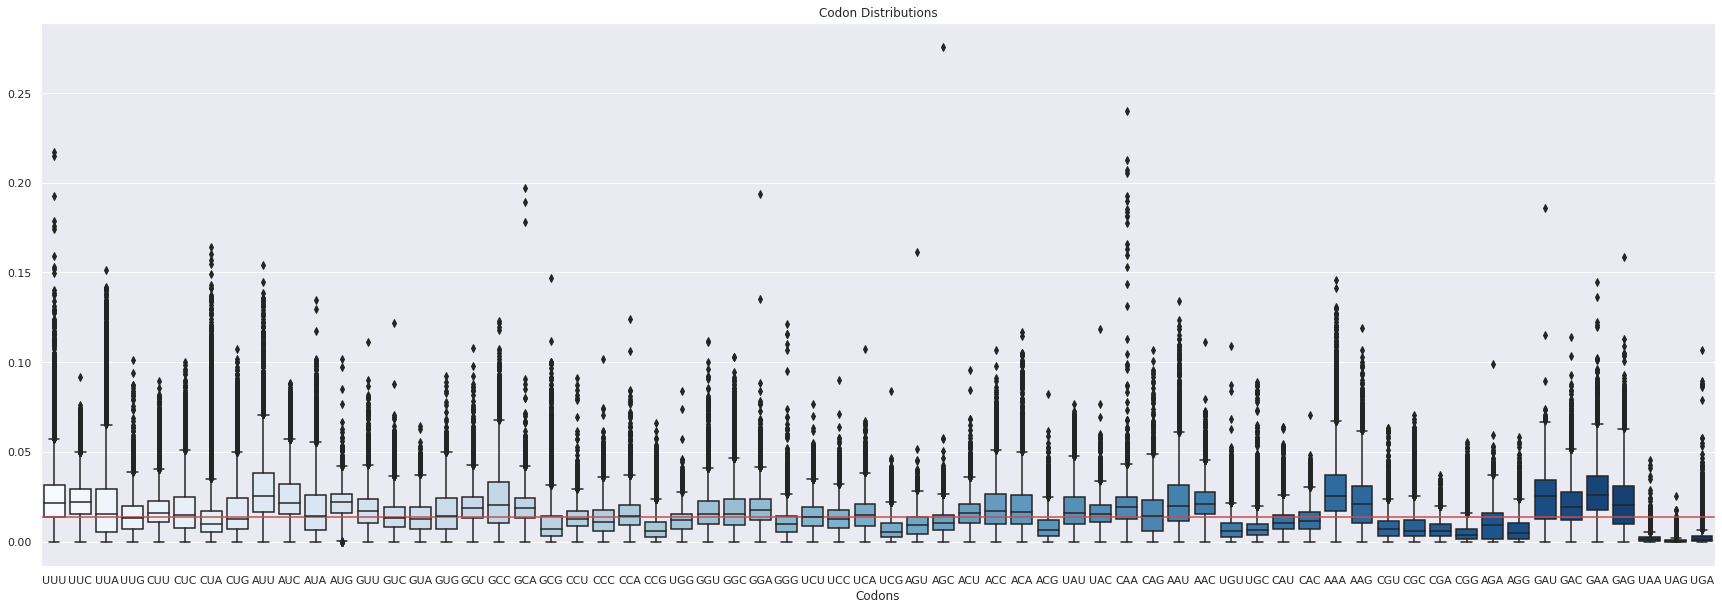

In [151]:
plt.figure(figsize=(30, 10))
sns.boxplot(data=justcodon, palette='Blues')
plt.title('Codon Distributions')
plt.axhline(y=justcodon.median().mean(), color='r')
plt.xlabel('Codons')
plt.show()


**A few observations**
- The stop codons `UAA`, `UAG` `UGA` have the lowest occurance, this makes sense since stop codons are what tells the translation machinery when to stop translation, so they will not be as frequent in the RNA/DNA sequence as the rest of the codons.

- The start codon `AUG` occurance is quite similar accross all species as the distribution is tending towards the median.

    - `UUU` `UUC`:
- These codons encode for the amino acid Phenylalanine. As this amino acid only has two codons that can encode for it, the distributions have a similar median, but `UUU` has slightly more recorded occurances among the different species.

    - `AUU` `AUC` `AUA`:
- These three codons encode for the amino acid Isoleucine. From the distributions `AUU` and `AUC` has higher occurances in the species. So they tend to be the ones found most among species to encode for the amino acid, with `AUU` having a higher median so it is even more favoured over `AUC`.

    - `ACU` `ACC` `ACA` `ACG`
- These encode for the amino acid Theronine. The distributions show that `ACC` and `ACA` have a wider range of occurances among the species while `ACU` codon appears to be the higher occuring one for this amino acid.

    - `CAA` `CAG`
- These codons encode for the amino acid Glutamine. From the distributions it is apparent that `CAA` is more frequent in its occurance among species.

    - `AAU` `AAC`
- These codons encode for the amino acid Asparagine. Seeing that this amino acid only has two type of codons that can encode it, the distributions show a similar median for both however `AAC` tends to be favoured.

These frequencies are highly dependent on the size of the sequence, DNA length that was sequenced. Therefore, it is important to view their distributions in relation to either DNA type or Kingdom.

--- 

## Bivariate Analysis

### Kingdom classes:

- Are there codons that have a higher occurence in certain Kingdoms?

In [152]:
clustergraph_kingdom = codon.drop(
    columns=['DNAtype', 'SpeciesID', 'Ncodons', 'SpeciesName'], axis=1)
clustergraph_kingdom.set_index('Kingdom', inplace=True)


In [153]:
fig = px.imshow(clustergraph_kingdom.groupby(level='Kingdom').mean(
),  color_continuous_scale='Cividis', origin='lower')  # or RdBu_r
fig.update_layout()
fig.show()


From the heatmap it appears that `CUA` has a high occurance in the vertebrate kingdom. furthermore the Aspartic Acid (`GAU` and `GAC`) and Glutamic Acid (`GAA` and `GAG`) codons seem to have high occurances in all of the kingdoms but not as much in the vertebrate kingdom in comparison with the rest. 

`CAG` has a higher occurance for archea kingdom. 

`CUA` is highly favoured in vertebrates, this codon encodes for Leucine.

### DNAtype classes:

- Are there codons that have a higher occurance in certain DNA types?

In [154]:
clustergraph_dna = codon.drop(
    columns=['Kingdom', 'SpeciesID', 'Ncodons', 'SpeciesName'], axis=1)
clustergraph_dna.set_index('DNAtype', inplace=True)


In [155]:
fig = px.imshow(clustergraph_dna.groupby(level='DNAtype').mean(),
                color_continuous_scale='Cividis', origin='lower')  # or RdBu_r
fig.update_layout()
fig.show()


In the heatmap for DNAtype codon frequencies, there are some codons that have frequencies. It appears that for DNAtype 1 which is mitochondria, there is a higher frequency of `CUA` which codes for the amino acid Leucine. While for Nuclear DNA there is almost an avoidance of the `CUA` codon. Moreover, in terms of the stop codons, it appears that mitochondrial DNA (1) seems to favour `UGA` stop codon over the over two.

Another noteworthy pattern, mitochondrial DNA shows obvious order of favouring for the Theronine amino acid encoding codons; `ACG`, `ACA`, `ACC`, and `ACU`. There is a higher occurance of `ACA` for this amino acid.

Nuclear DNA (0) seems to have a different pattern, in terms of frequency there are obvious codons that are more occurent for amino acids, however it isn't as pronounced.

---

# Saving data

In [156]:
codon['Kingdom'].unique()


array(['virus', 'archaea', 'bacteria', 'phage', 'plant', 'invertebrate',
       'vertebrate'], dtype=object)

In [157]:
# Save data as pickle file to data folder
joblib.dump(codon, '../data/codon_after_eda.pkl')


['../data/codon_after_eda.pkl']